Primeiras linhas do DataFrame:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0 

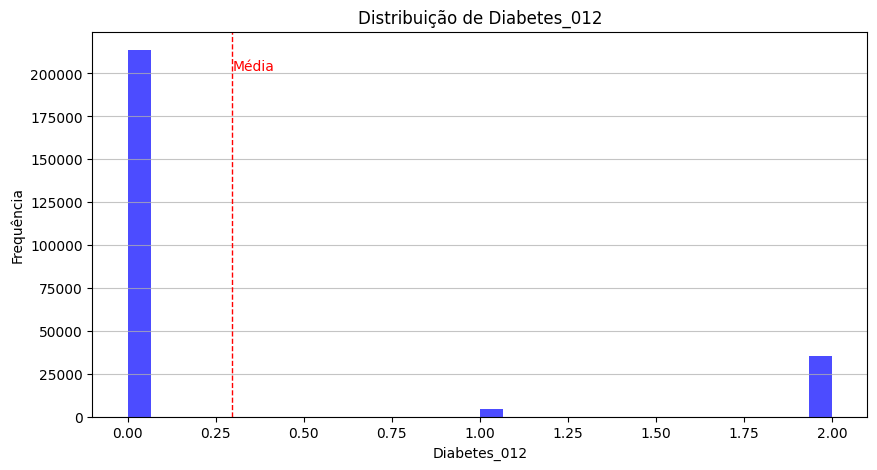

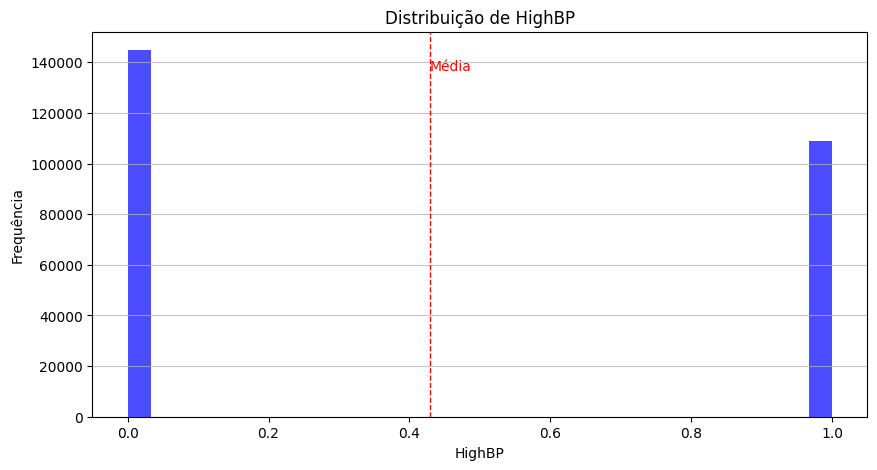

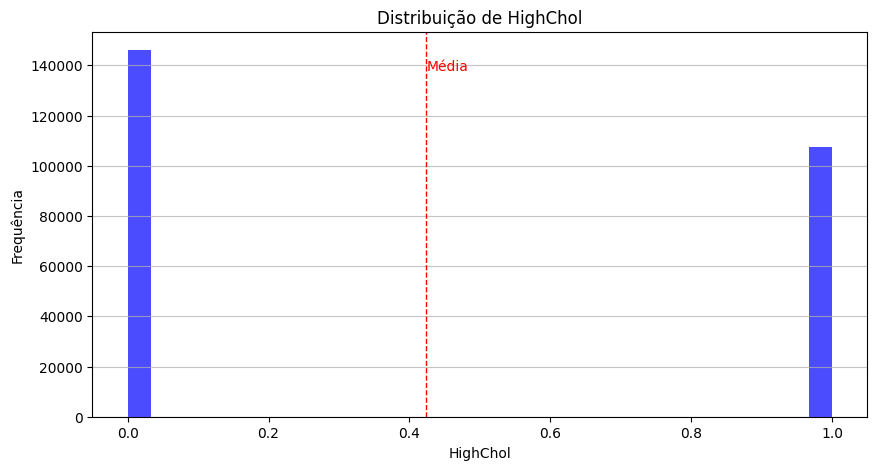

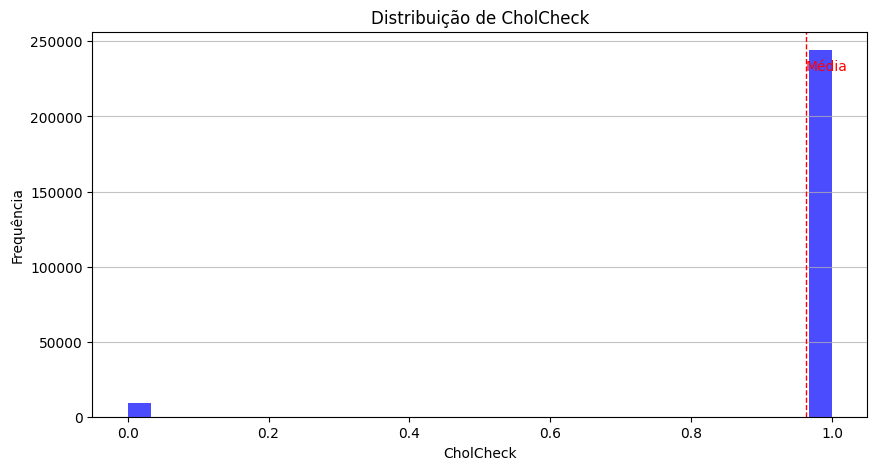

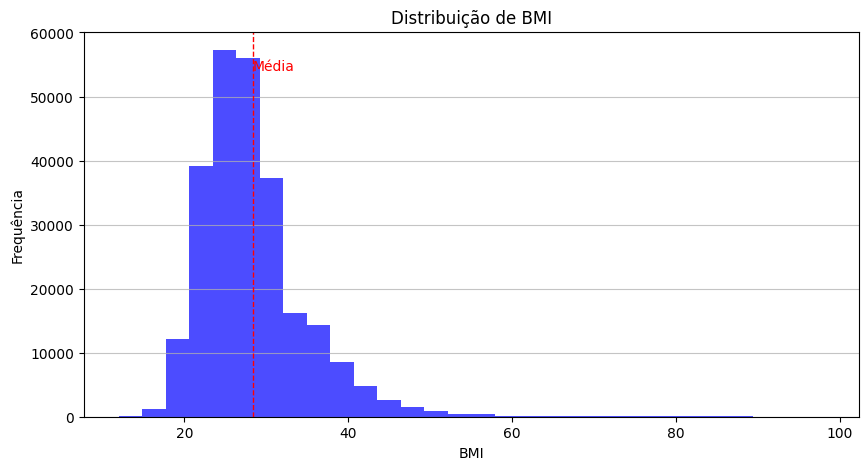

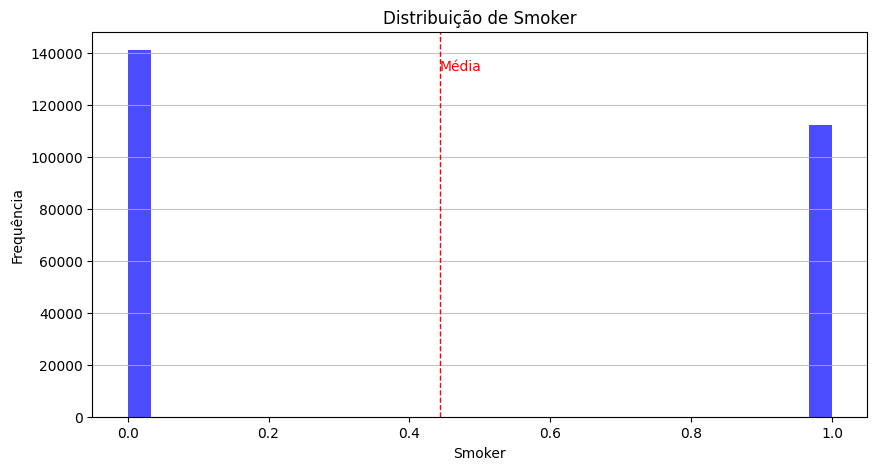

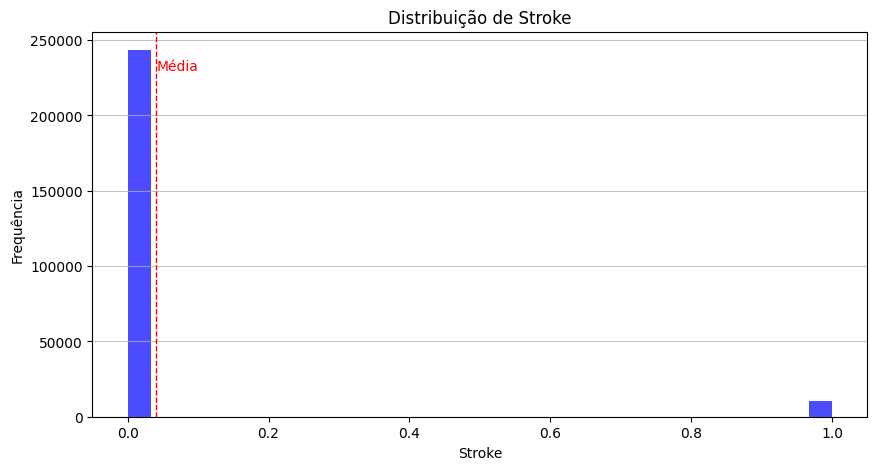

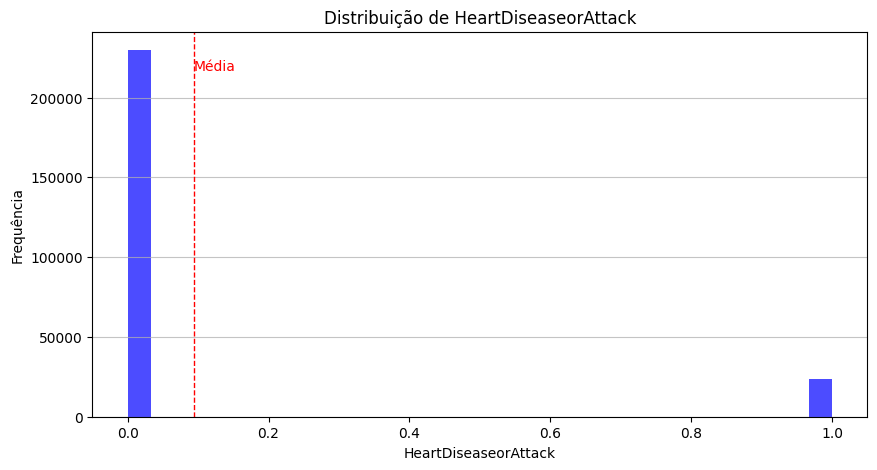

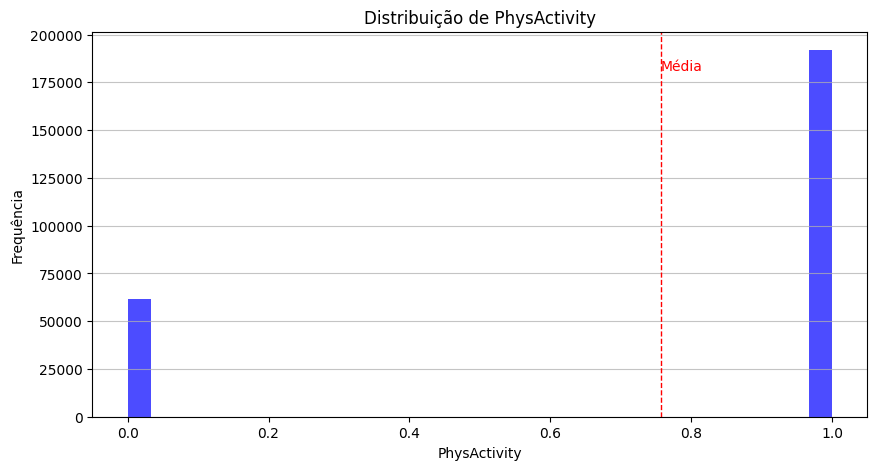

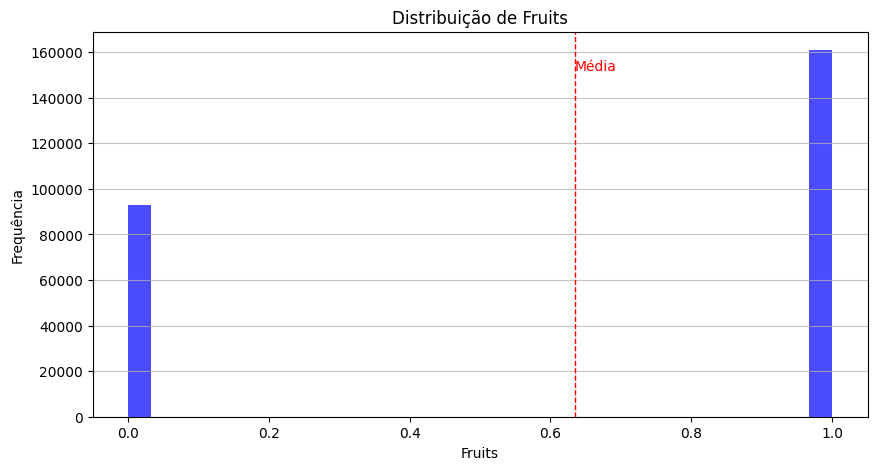

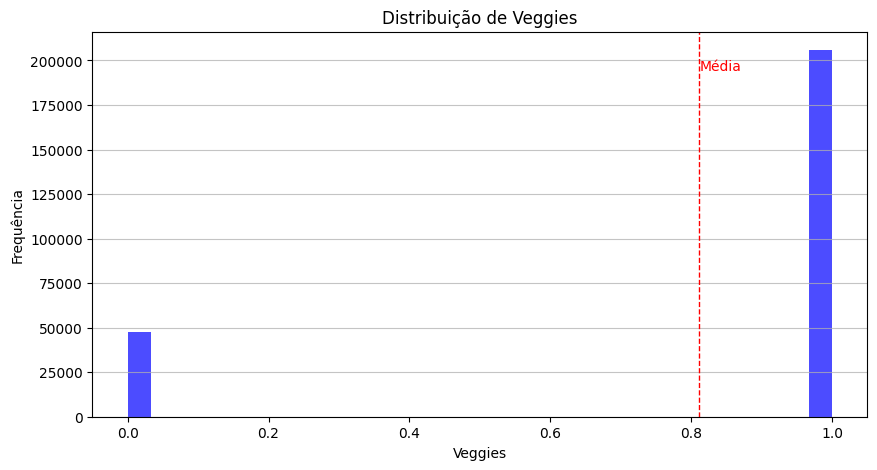

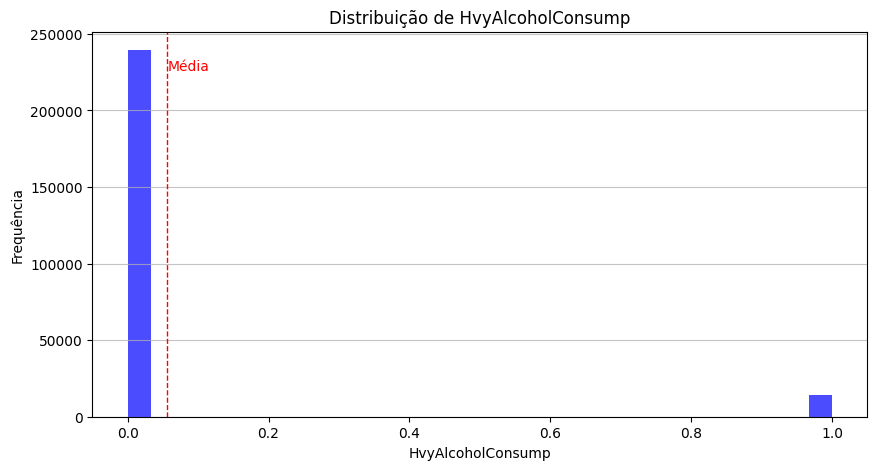

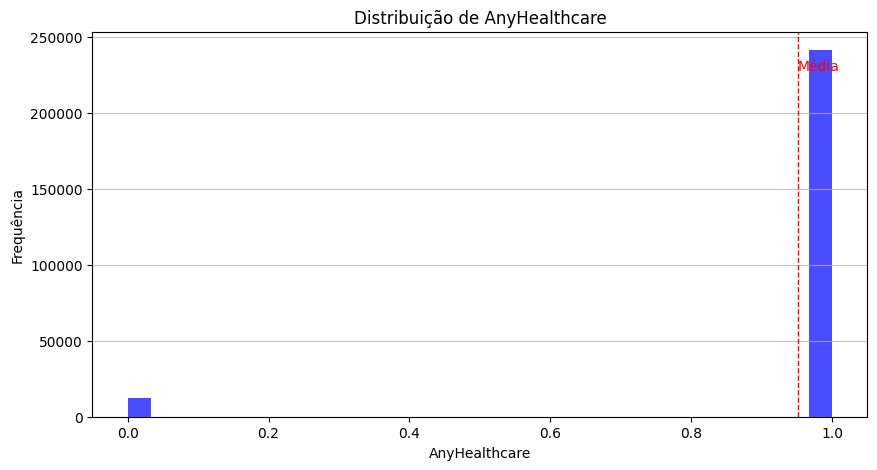

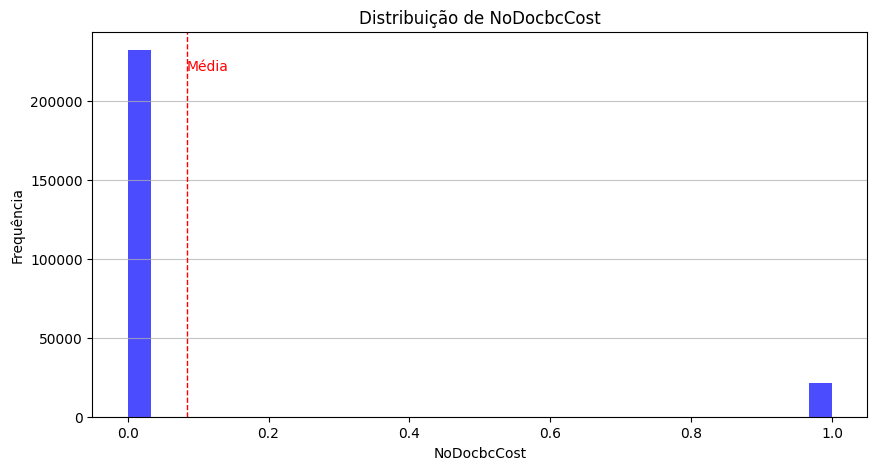

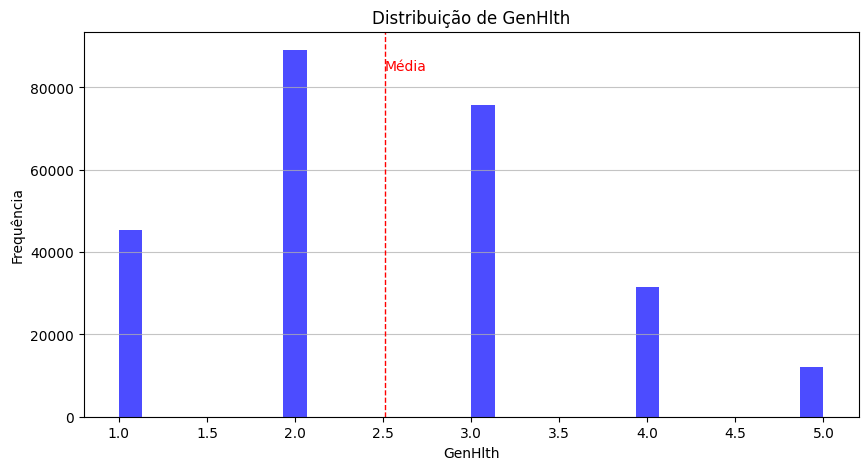

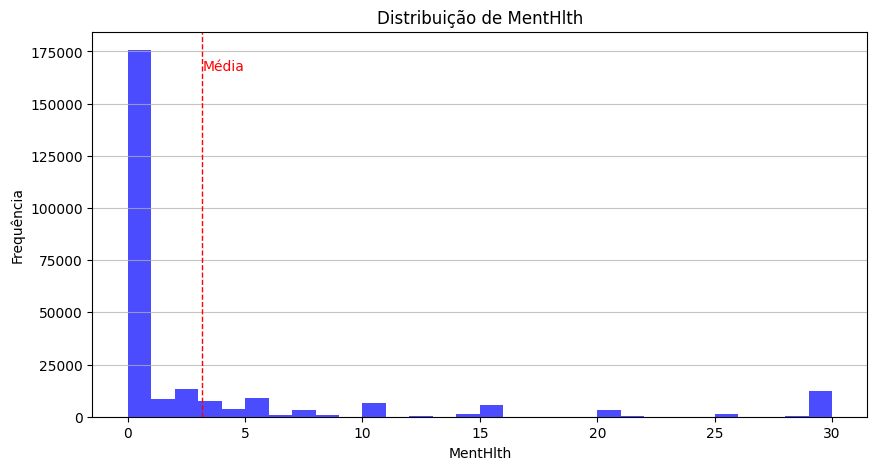

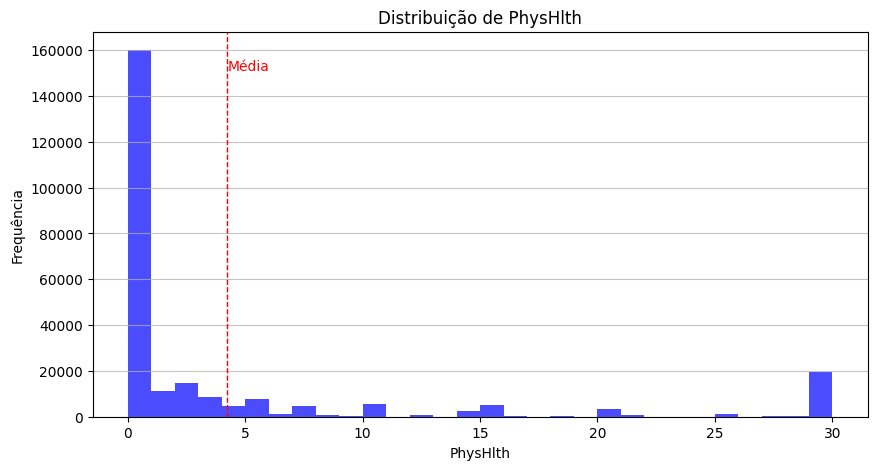

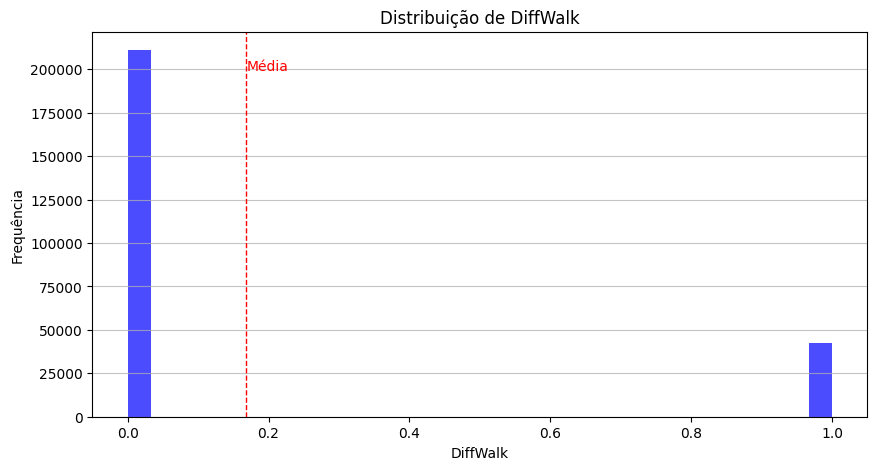

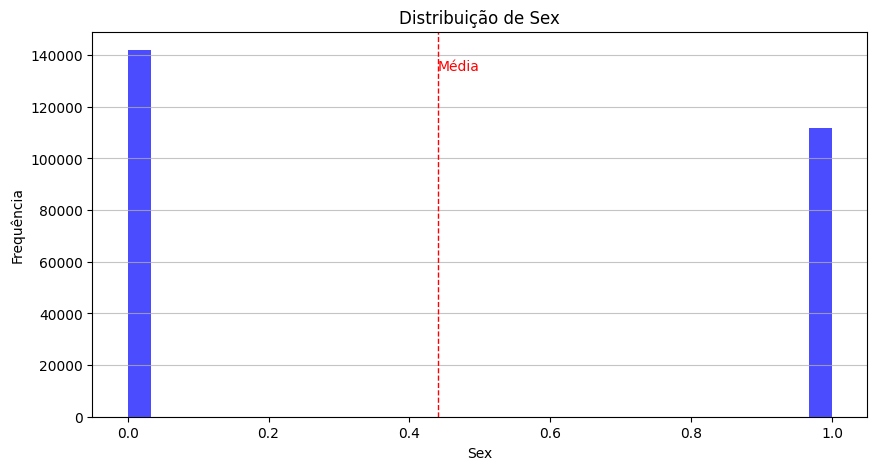

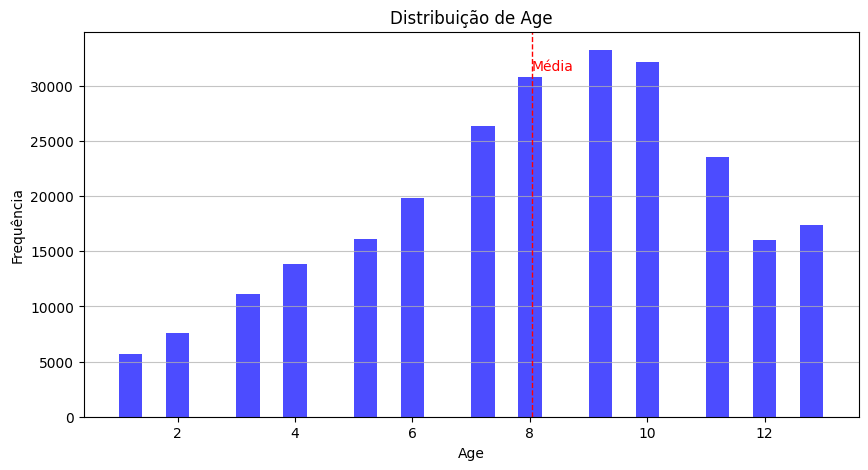

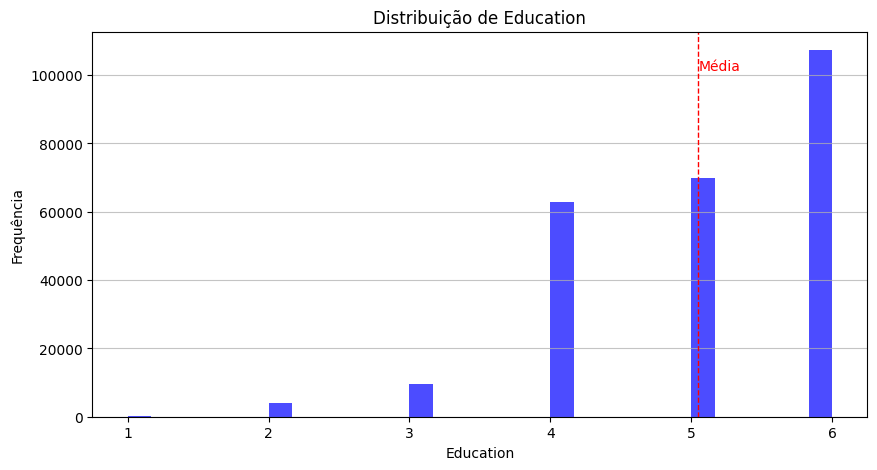


Matriz de Correlação:
                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.271596  0.209085   0.067546  0.224379   
HighBP                    0.271596  1.000000  0.298199   0.098508  0.213748   
HighChol                  0.209085  0.298199  1.000000   0.085642  0.106722   
CholCheck                 0.067546  0.098508  0.085642   1.000000  0.034495   
BMI                       0.224379  0.213748  0.106722   0.034495  1.000000   
Smoker                    0.062914  0.096991  0.091299  -0.009929  0.013804   
Stroke                    0.107179  0.129575  0.092620   0.024158  0.020153   
HeartDiseaseorAttack      0.180272  0.209361  0.180765   0.044206  0.052904   
PhysActivity             -0.121947 -0.125267 -0.078046   0.004190 -0.147294   
Fruits                   -0.042192 -0.040555 -0.040859   0.023849 -0.087518   
Veggies                  -0.058972 -0.061266 -0.039874   0.006121 -0.062275   
HvyAlcoholConsump        -0.0

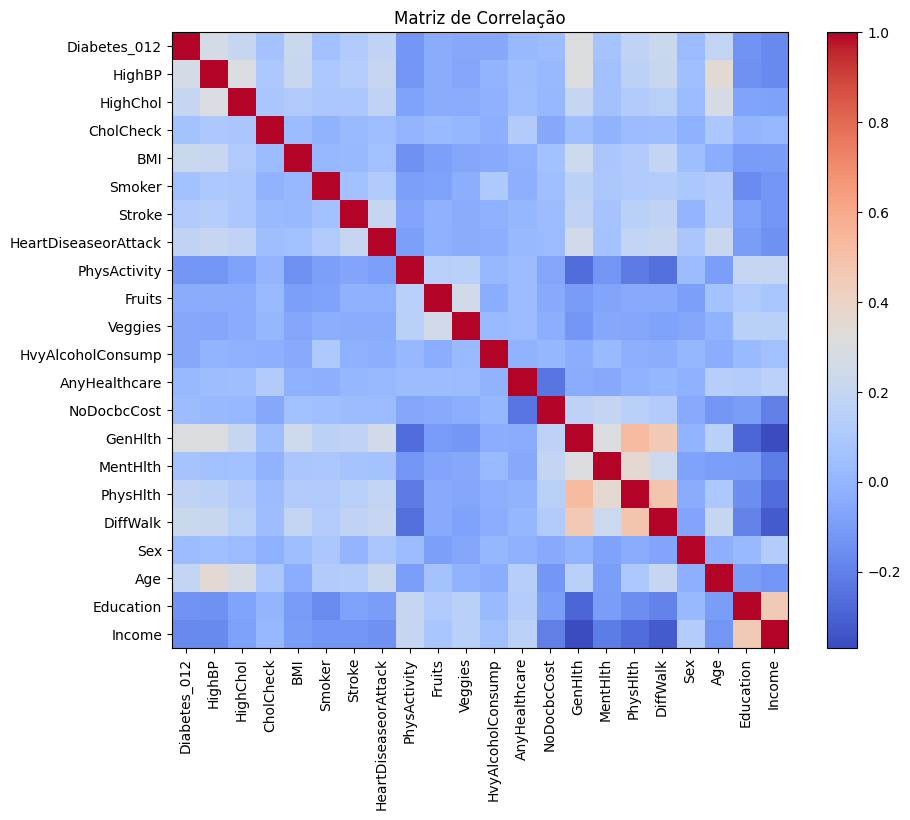

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


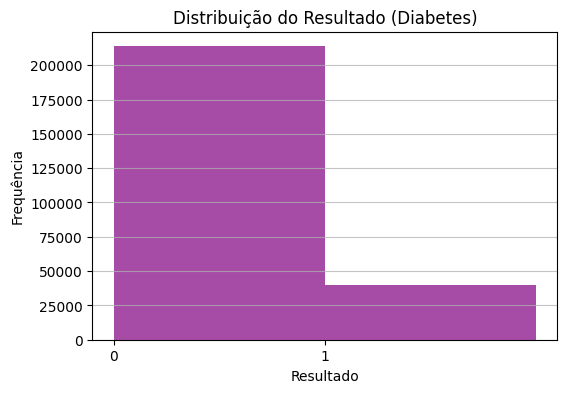

Arquivo 'diabetes_analyzed.csv' salvo com sucesso.


In [29]:
# Instalar pacotes necessários
!pip install pandas matplotlib

# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('Diabetes.csv')

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Resumo estatístico do DataFrame
print("\nResumo estatístico:")
print(df.describe())

# Verificar dados faltantes
print("\nDados faltantes em cada coluna:")
print(df.isnull().sum())

# Visualizar a distribuição de cada característica
features = df.columns[:-1]  # Supondo que a última coluna é o resultado (Outcome)
for feature in features:
    plt.figure(figsize=(10, 5))
    plt.hist(df[feature], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.axvline(df[feature].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.text(df[feature].mean(), plt.ylim()[1]*0.9, 'Média', color='red')
    plt.show()

# Análise da correlação entre as variáveis
correlation_matrix = df.corr()
print("\nMatriz de Correlação:")
print(correlation_matrix)

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Matriz de Correlação')
plt.show()

# Análise de distribuição do resultado (Outcome)
# Verificar o nome correto da coluna de resultado
print(df.columns)  # Imprimir todas as colunas do DataFrame
# Se o nome da coluna for diferente de 'Outcome', substitua 'Outcome' pelo nome correto abaixo
outcome_column = 'Diabetes_012'  # Substitua 'Diabetes_012' pelo nome real da coluna se necessário
plt.figure(figsize=(6, 4))
plt.hist(df[outcome_column], bins=2, alpha=0.7, color='purple')
plt.title('Distribuição do Resultado (Diabetes)')
plt.xlabel('Resultado')
plt.ylabel('Frequência')
plt.xticks([0, 1])
plt.grid(axis='y', alpha=0.75)
plt.show()

# Salvar o DataFrame e a matriz de correlação em um arquivo CSV
df.to_csv('diabetes_analyzed.csv', index=False)
print("Arquivo 'diabetes_analyzed.csv' salvo com sucesso.")

In [22]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from google.colab import files

def gerar_relatorio_diabetes(df, nome_arquivo="relatorio_diabetes.html"):
    # Amostra da tabela
    tabela_html = df.sample(10).to_html()

    graficos_html = ""
    for coluna in df.columns:
        # Verificar se a coluna não é a coluna de rótulo
        if coluna != 'tem_diabetes':
            # Criar gráficos
            grafico = px.histogram(df, x=coluna, color='tem_diabetes', text_auto=True)
            grafico1 = px.density_heatmap(df, x=coluna, y='tem_diabetes', text_auto=True)
            grafico2 = px.violin(df, x='tem_diabetes', y=coluna, box=True, points="all")

            grafico2.update_layout(title=f'Gráfico de Violino: Diabetes vs {coluna}',
                                   xaxis_title='Tem Diabetes', yaxis_title=coluna,
                                   template='plotly_white', font=dict(family='Arial', size=12),
                                   margin=dict(l=50, r=50, b=50, t=50),
                                   violinmode='group')

            # Converter gráficos para HTML
            graficos_html += pio.to_html(grafico)
            graficos_html += pio.to_html(grafico1)
            graficos_html += pio.to_html(grafico2)

    # Análises (texto descritivo)
    analises_html = """
    <h2>Análises</h2>
    <p>As análises mostram que níveis elevados de glicose estão frequentemente associados a casos de diabetes.</p>
    <p>Pacientes mais velhos tendem a ter um risco maior de desenvolver diabetes.</p>
    <p>A pressão arterial elevada também pode estar relacionada ao diabetes em alguns casos.</p>
    """

    # Montar o relatório HTML completo
    relatorio_html = f"""
    <h1>Relatório de Diabetes</h1>
    <h2>Amostra da Tabela</h2>
    {tabela_html}
    {graficos_html}
    {analises_html}
    """

    # Escrever o relatório em um arquivo HTML
    with open(nome_arquivo, 'w') as f:
        f.write(relatorio_html)

    print(f'Relatório HTML gerado com sucesso: {nome_arquivo}')

    # Fazer o download do arquivo HTML gerado
    files.download(nome_arquivo)

# Exemplo de uso
# df = pd.read_csv('caminho_para_seu_arquivo_diabetes.csv')  # Carregar seu conjunto de dados sobre diabetes
# gerar_relatorio_diabetes(df)
